### Different methods of aggregation from livelihood to admin2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import os
import sys
path_mod = f"{Path(os.path.dirname(os.path.abspath(''))).parents[1]}/"
print(path_mod)
sys.path.append(path_mod)
# from indicators.drought.iri_rainfallforecast import get_iri_data,statistics_alldates
# from indicators.drought.icpac_rainfallforecast import get_icpac_data
# from indicators.drought.nmme_rainfallforecast import get_nmme_data
from indicators.food_insecurity.config import Config
from indicators.food_insecurity.ipc_definemetrics import define_trigger_percentage, define_trigger_increase, define_trigger_increase_rel
from indicators.food_insecurity.utils import compute_percentage_columns
from utils_general.plotting import plot_boundaries_binary

/Users/tinkavalentijn/Documents/CHD/AAFI/pa-anticipatory-action/


In [9]:
country="ethiopia"
#suffix of filenames
suffix=""
config=Config()
parameters = config.parameters(country)
country_folder = os.path.join(config.DIR_PATH, config.ANALYSES_DIR, country)
adm1_bound_path= os.path.join(country_folder,config.DATA_DIR,config.SHAPEFILE_DIR,parameters["path_admin1_shp"])
fnwp_dir = os.path.join(country_folder, config.DATA_DIR, config.FEWSWORLDPOP_PROCESSED_DIR)
fnwp_path = os.path.join(fnwp_dir,config.FEWSWORLDPOP_PROCESSED_FILENAME.format(country=country,admin_level=admin_level,suffix=suffix))
fnocha_dir = os.path.join(country_folder, config.DATA_DIR, config.FEWSADMPOP_PROCESSED_DIR)
fnocha_path = os.path.join(fnocha_dir,f"{country}_fewsnet_admin{admin_level}.csv")

admin_level=1

In [16]:
gdf=gpd.read_file(adm1_bound_path).rename(columns={parameters["shp_adm1c"]:config.ADMIN1_COL})

### WorldPop

In [10]:
df_fadm=pd.read_csv(fnwp_path)
df_fadm["date"]=pd.to_datetime(df_fadm["date"])
df_fadm["year"]=df_fadm["date"].dt.year
df_fadm["month"]=df_fadm["date"].dt.month

In [8]:
df_fadm.tail()

,ADMIN0,ADMIN1,date,CS_1,CS_2,CS_3,CS_4,CS_99,ML1_1,ML1_2,...,ML2_3p,perc_ML2_3p,ML2_4p,perc_ML2_4p,ML2_2m,perc_ML2_2m,perc_inc_ML2_3p,perc_inc_ML1_3p,year,month
511,Ethiopia,Benishangul Gumz,2020-10-01,1.148038e+06,1.172883e+05,0.00000,0.0,NaN,1.148038e+06,1.172883e+05,...,0.000000e+00,0.000000,0.0,0.0,1.265326e+06,100.000000,0.000000,0.000000,2020,10
512,Ethiopia,Afar,2020-10-01,1.613871e+04,1.417134e+06,612370.21875,0.0,NaN,1.613871e+04,1.114601e+06,...,1.761135e+06,86.092025,0.0,0.0,2.845075e+05,13.907975,56.156680,14.789126,2020,10
513,Ethiopia,Addis Ababa,2020-10-01,3.938355e+06,0.000000e+00,0.00000,0.0,NaN,3.938355e+06,0.000000e+00,...,0.000000e+00,0.000000,0.0,0.0,3.938355e+06,100.000000,0.000000,0.000000,2020,10
514,Ethiopia,Tigray,2020-10-01,6.210399e+06,3.347936e+05,0.00000,0.0,NaN,4.480197e+06,2.064996e+06,...,8.561870e+05,13.081159,0.0,0.0,5.689005e+06,86.918841,13.081159,0.000000,2020,10
515,Ethiopia,Amhara,2020-10-01,2.304478e+07,1.651785e+06,0.00000,0.0,NaN,2.078818e+07,3.908391e+06,...,2.575729e+06,10.429500,0.0,0.0,2.212084e+07,89.570500,10.429500,0.000000,2020,10


In [13]:
df_fadm["trigger_ML1_4_20"]=df_fadm.apply(lambda x: define_trigger_percentage(x,"ML1",4,20),axis=1)
df_fadm["trigger_ML1_3_30"]=df_fadm.apply(lambda x: define_trigger_percentage(x,"ML1",3,30),axis=1)
df_fadm["trigger_ML1_3_5i"]=df_fadm.apply(lambda x: define_trigger_increase(x,"ML1",3,5),axis=1)
#currently (Oct 2020) selected trigger
df_fadm_trig=df_fadm.loc[(df_fadm["trigger_ML1_4_20"]==1) | ((df_fadm["trigger_ML1_3_30"]==1) & (df_fadm["trigger_ML1_3_5i"]==1))]
display(df_fadm_trig.groupby(['year', 'month'], as_index=False)[f"ADMIN{admin_level}",'perc_ML1_4','perc_CS_3p','perc_ML1_3p'].agg(lambda x: list(x)))
# df_fadm_trig["an1"]={"df":df_an1,"trig_cols":["ML1_3p","CS_3p","ML1_4"],"desc":"At least 20% of ADMIN1 population in IPC4+ at ML1 OR (At least 30% of ADMIN1 population projected at IPC3+  AND increase by 5 percentage points in ADMIN1 pop.  projected in IPC3+ compared to current state)"}

,year,month,ADMIN1,perc_ML1_4,perc_CS_3p,perc_ML1_3p
0,2009,7,"[Somali, Gambela]","[58.838478590938884, 0.02042319105364591]","[99.92630206112149, 0.35967690558953597]","[99.92630205392872, 60.86321138942488]"
1,2010,1,"[Tigray, Somali, Harari, Dire Dawa, Gambela, A...","[15.498742872540445, 20.9428185393442, 0.0, 0....","[17.812106920283046, 66.21220082737858, 0.0, 0...","[47.74658231203844, 99.94487702875485, 100.0, ..."
2,2010,10,[Somali],[0.0],[3.847626394095229],[29.90268555469125]
3,2011,4,[Somali],[42.04157234227331],[99.70272903008734],[99.72828794624691]
4,2011,7,[Somali],[35.169034032132174],[99.88700508785186],[99.88700510867235]
5,2012,4,[Afar],[0.0],[25.907795306541747],[46.83084649974166]
6,2013,1,"[Somali, Sidama, SNNP]","[0.0, 0.0, 0.0]","[27.985839782976733, 0.0, 8.652726675156972e-05]","[53.664306949241286, 45.78467852807977, 35.326..."
7,2016,2,[Amhara],[2.511534687823407],[24.027335589190763],[29.640725645949203]
8,2017,6,[Somali],[23.77530894791369],[61.220325449332655],[61.35341463827103]
9,2017,10,[Somali],[21.660499771703197],[47.20013319510721],[66.04164880153716]


In [14]:
df_focha=pd.read_csv(fnocha_path)
df_focha=df_focha.rename(columns={parameters["shp_adm1c"]:"ADMIN1"})
df_focha["date"]=pd.to_datetime(df_focha["date"])
df_focha["year"]=df_focha["date"].dt.year
df_focha["month"]=df_focha["date"].dt.month
df_focha=compute_percentage_columns(df_focha,config)

In [15]:
df_focha["trigger_ML1_4_20"]=df_focha.apply(lambda x: define_trigger_percentage(x,"ML1",4,20),axis=1)
df_focha["trigger_ML1_3_30"]=df_focha.apply(lambda x: define_trigger_percentage(x,"ML1",3,30),axis=1)
df_focha["trigger_ML1_3_5i"]=df_focha.apply(lambda x: define_trigger_increase(x,"ML1",3,5),axis=1)
#currently (Oct 2020) selected trigger
df_focha_trig=df_focha.loc[(df_focha["trigger_ML1_4_20"]==1) | ((df_focha["trigger_ML1_3_30"]==1) & (df_focha["trigger_ML1_3_5i"]==1))]
display(df_focha_trig.groupby(['year', 'month'], as_index=False)[f"ADMIN{admin_level}",'perc_ML1_4','perc_CS_3p','perc_ML1_3p'].agg(lambda x: list(x)))
# df_focha_trig["an1"]={"df":df_an1,"trig_cols":["ML1_3p","CS_3p","ML1_4"],"desc":"At least 20% of ADMIN1 population in IPC4+ at ML1 OR (At least 30% of ADMIN1 population projected at IPC3+  AND increase by 5 percentage points in ADMIN1 pop.  projected in IPC3+ compared to current state)"}

,year,month,ADMIN1,perc_ML1_4,perc_CS_3p,perc_ML1_3p
0,2009,7,"[Gambela, Somali]","[0.0, 62.25048019876748]","[0.0, 100.0]","[82.91970981215955, 100.0]"
1,2010,1,"[Afar, Dire Dawa, Gambela, Harari, Oromia, Som...","[34.30358069903852, 0.0, 82.91970248035976, 0....","[73.90069039391682, 0.0, 82.91970248035976, 0....","[100.0, 100.0, 82.91970248035976, 100.0, 34.21..."
2,2010,10,[Somali],[0.0],[4.3155592447318085],[33.315339657758805]
3,2011,4,[Somali],[43.63107371327632],[100.0],[100.0]
4,2011,7,[Somali],[40.65175737468207],[100.0],[100.0]
5,2012,4,[Afar],[0.0],[25.50364030854231],[59.80724154142381]
6,2013,1,"[SNNP, Sidama, Somali]","[0.0, 0.0, 0.0]","[0.0, 0.0, 28.11168172211739]","[38.98456684147001, 100.0, 59.28994340310864]"
7,2016,2,"[Amhara, Oromia]","[2.340714888464603, 16.56804878138689]","[31.82699327623618, 31.6474039541132]","[38.287677149773096, 41.26491861866744]"
8,2017,6,[Somali],[35.90226426036655],[69.58691042140016],[69.58691042140016]
9,2017,10,[Somali],[25.39301938511138],[49.824775317905676],[69.58691042140016]


In [17]:
df_fadm["threshold_reached"]= np.where((df_fadm["trigger_ML1_4_20"]==1) | ((df_fadm["trigger_ML1_3_30"]==1) & (df_fadm["trigger_ML1_3_5i"]==1)),1,0)
df_fadm=gdf[["ADMIN1","geometry"]].merge(df_fadm,how="right")

df_focha["threshold_reached"]= np.where((df_focha["trigger_ML1_4_20"]==1) | ((df_focha["trigger_ML1_3_30"]==1) & (df_focha["trigger_ML1_3_5i"]==1)),1,0)
df_focha=gdf[["ADMIN1","geometry"]].merge(df_focha,how="right")

In [18]:
len(df_focha_trig)

32

In [19]:
len(df_fadm_trig)

31

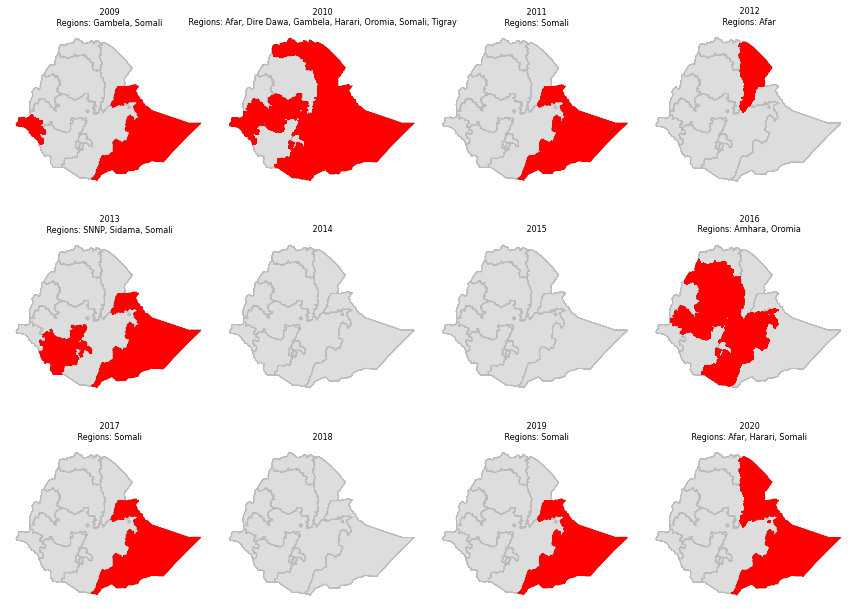

In [119]:
fig_boundbin=plot_boundaries_binary(df_focha,"threshold_reached",subplot_col="year",subplot_str_col="year",region_col="ADMIN1",colp_num=4,only_show_reached=False)

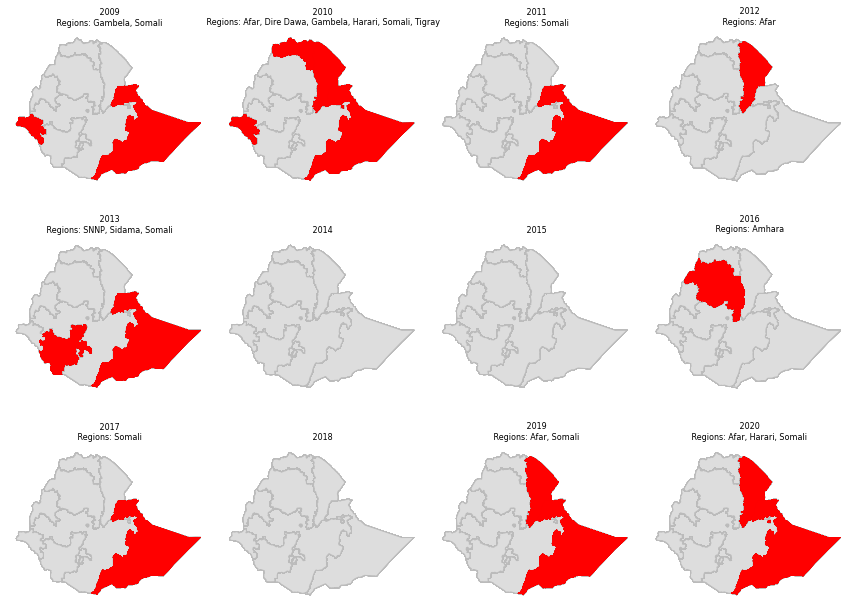

In [127]:
fig_boundbin=plot_boundaries_binary(df_fadm,"threshold_reached",subplot_col="year",subplot_str_col="year",region_col="ADMIN1",colp_num=4,only_show_reached=False)

#### Differences FN OCHA adm pop and Worldpop pop
2010-01 Oromia is triggered with ocha but not with worldpop. This is because the 30% 3+ ML1 is not reached. For worldpop the percentage is 28 whereas for ocha it is 34. Hard to say from images which makes more sense, is a border case.   
2016-02 Oromia is triggered with ocha and not with worldpop. This is because the 5% increase threshold is not reached. For worldpop the percentage is 1.6 and for ocha 9.6. Looking at the images, a relatively small areas changes from ipc3+ to ipc2. However, this area does change one large adm2 from ipc2 to ipc3+. I would argue the worldpop approach is more correct   
2019-10 Afar is triggered with worldpop and not with ocha. This is because the 5% increase threshold is not reached. Looking at the images, there is an increase in area that is projected to be IPC3+ but this doesn't change the major ipc phase coverage of an admin2. Thus would argue the worldpop approach is more correct

#### Digging deeper into differences

In [154]:
df_focha[(df_focha.year==2016)&(df_focha.threshold_reached==1)]

,ADMIN1,geometry,Unnamed: 0,date,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,...,ML2_4p,perc_ML2_4p,ML2_2m,perc_ML2_2m,perc_inc_ML2_3p,perc_inc_ML1_3p,trigger_ML1_4_20,trigger_ML1_3_30,trigger_ML1_3_5i,threshold_reached
112,Amhara,"POLYGON ((36.52608 13.58428, 36.53155 13.58167...",314,2016-02-01,22808290,22781288,13136053.0,2394636.0,7250599.0,0.0,...,1129226.0,4.956814,10512886.0,46.147022,22.025985,6.460684,0,1,1,1
327,Oromia,"POLYGON ((38.75293 10.37955, 38.76123 10.37559...",319,2016-02-01,39382119,39335495,19449311.0,7437521.0,5931539.0,6517124.0,...,6517124.0,16.568049,21972503.0,55.859226,12.493370,9.617515,0,1,1,1


In [153]:
df_fadm[(df_fadm.year==2016)&(df_fadm.threshold_reached==1)]

,ADMIN1,geometry,ADMIN0,date,CS_1,CS_2,CS_3,CS_4,CS_99,ML1_1,...,trigger_ML1_3_10i,trigger_ML1_3_20i,trigger_ML1_3_30i,trigger_ML1_3_40i,trigger_ML1_3_50i,trigger_ML1_3_70i,trigger_ML2_4_20,trigger_ML2_3_30,trigger_ML2_3_5i,threshold_reached
413,Amhara,"POLYGON ((36.52608 13.58428, 36.53155 13.58167...",Ethiopia,2016-02-01,10063250.0,7270070.625,5200414.5,281471.84375,NaN,9204451.0,...,0,0,0,0,0,0,0,1,1,1


In [157]:
df_focha[(df_focha.date=="2016-02-01")][["ADMIN1","trigger_ML1_4_20","trigger_ML1_3_30","trigger_ML1_3_5i","perc_CS_3p","perc_ML1_3p","perc_inc_ML1_3p"]]

,ADMIN1,trigger_ML1_4_20,trigger_ML1_3_30,trigger_ML1_3_5i,perc_CS_3p,perc_ML1_3p,perc_inc_ML1_3p
26,Addis Ababa,0,0,0,0.000000,0.000000,0.000000
69,Afar,0,1,0,100.000000,100.000000,0.000000
112,Amhara,0,1,1,31.826993,38.287677,6.460684
155,Benishangul Gumz,0,0,0,0.000000,0.000000,0.000000
198,Dire Dawa,0,1,0,100.000000,100.000000,0.000000
241,Gambela,0,0,0,0.000000,0.000000,0.000000
284,Harari,0,1,0,100.000000,100.000000,0.000000
327,Oromia,0,1,1,31.647404,41.264919,9.617515
370,SNNP,0,0,0,19.270028,19.270028,0.000000
413,Sidama,0,0,0,0.000000,0.000000,0.000000


In [158]:
df_fadm[(df_fadm.date=="2016-02-01")][["ADMIN1","trigger_ML1_4_20","trigger_ML1_3_30","trigger_ML1_3_5i","perc_CS_3p","perc_ML1_3p","perc_inc_ML1_3p"]]

,ADMIN1,trigger_ML1_4_20,trigger_ML1_3_30,trigger_ML1_3_5i,perc_CS_3p,perc_ML1_3p,perc_inc_ML1_3p
26,Addis Ababa,0,0,0,0.000000,0.000000,0.000000e+00
69,Tigray,0,0,0,20.548658,20.548658,5.579706e-08
112,Somali,0,0,0,12.578247,12.578247,4.837669e-07
155,Sidama,0,0,0,11.138070,11.138070,0.000000e+00
198,Oromia,0,1,0,30.712280,32.292593,1.580313e+00
241,Harari,0,1,0,100.000000,100.000000,0.000000e+00
284,SNNP,0,0,0,20.407751,20.408362,6.112827e-04
327,Dire Dawa,0,1,0,100.000000,100.000000,0.000000e+00
370,Benishangul Gumz,0,0,0,0.000000,0.016219,1.621858e-02
413,Amhara,0,1,1,24.027336,29.640726,5.613390e+00
